In [2]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
from scipy.interpolate import interp1d
%matplotlib inline

# Redshift-space correlation function

We can calculate the redshift-space correlation function $\xi(s)$ by averaging $\xi(\pi,\sigma)$ at constant $s$.

In [3]:
cosmo = ccl.Cosmology(Omega_c=0.2719, Omega_b=0.0499, h=0.6663, A_s=2.12e-9, n_s=0.9624, 
                      transfer_function='boltzmann_class')

In [4]:
s0 = np.logspace(-1., 2., 1000) # distance in RS space
a = 1. # Scale factor
beta = 0.4 # growth factor divided by bias
mu = 0.4 #cosine of angle

In [5]:
xi0 = ccl.correlation_3dRsd(cosmo,a,s0,mu,beta,do_avg_mu=True) #averaging at constant s

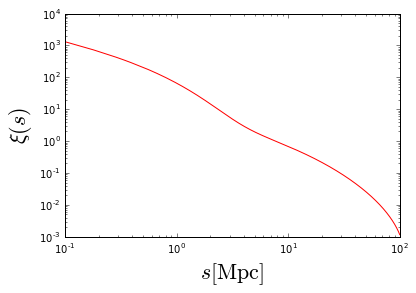

In [6]:
plt.plot(s0,xi0, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$s[\rm{Mpc}]$',fontsize=22)
plt.ylabel(r'$\xi(s)$',fontsize=22)
plt.show()

# The two-point correlation function, $\xi(\pi,\sigma)$

In [7]:
n_th = 500 #number of points in the angle array
n_s =100 #number of points in pi and sigma arrays
A = 0.2
th = []
for i in range(n_th):
    th.append(0.5*math.pi/n_th*i)

In [8]:
xi = []
for i in range(n_th):
    s = []
    for j in range(n_s):
        s.append(A*(j+1)/math.cos(th[i]))
    xi.append(ccl.correlation_3dRsd(cosmo,a,s,math.cos(th[i]),beta,do_avg_mu=False))

In [9]:
xi_final = []
for j in range(n_s):
    sig = []
    xi_new = []
    sig_new = []
    for i in range(n_th):
        sig.append(A*(j+1)*math.tan(th[i]))
        xi_new.append(xi[i][j])
    for k in range(n_s):
        sig_new.append(A*(k+1))
    f = interp1d(sig, xi_new)
    xi_final.append(f(sig_new))    

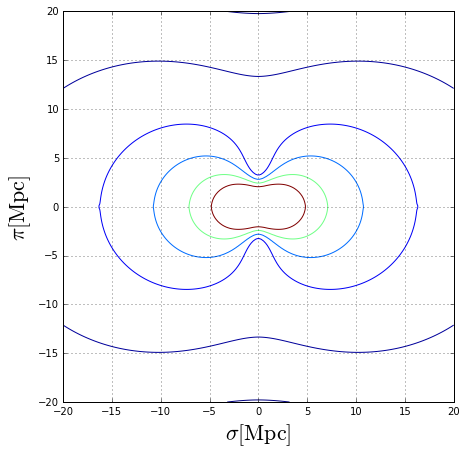

In [12]:
l = A*n_s
x = np.linspace(-l,l,2*n_s)
y = np.linspace(-l,l,2*n_s)
b1 = np.hstack((np.fliplr(xi_final),xi_final))
b2 = np.flipud(b1)
b = np.vstack((b2,b1))
v = [0.1,0.2,0.5,1,2,4]
plt.figure(figsize = (7,7))
plt.contour(x,y,b,v)
plt.xlabel(r'$\sigma[\rm{Mpc}]$',fontsize=22)
plt.ylabel(r'$\pi[\rm{Mpc}]$',fontsize=22)
plt.grid()
plt.show()